# Comparação de Algoritmos de Aprendizado Supervisionado em Problemas de Classificação
## Análise de Doenças Cardíacas

### Integrantes:
- Guilherme Possari
- Henry Eiji Maeda Takemoto
- Tomás Pagani Pires

### Objetivo:
Este notebook apresenta a análise exploratória e pré-processamento de dados para classificação de doenças cardíacas, aplicando diferentes algoritmos de aprendizado supervisionado.

---

## 1. Importação das Bibliotecas

Importamos todas as bibliotecas necessárias para análise exploratória, pré-processamento e implementação dos algoritmos.

In [11]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# Bibliotecas para machine learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Algoritmos de classificação
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Configurações para visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Suprimir warnings
import warnings
warnings.filterwarnings('ignore')

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2. Carregamento e Descrição da Base de Dados

Carregamos o dataset de doenças cardíacas atualizado (heart.csv) com 918 amostras e fazemos uma primeira análise das características dos dados. Este dataset possui maior volume de dados e melhor qualidade comparado ao dataset UCI original.

In [12]:
# Carregamento dos dados
# Vamos usar o dataset Heart Disease (heart.csv)

# Carregando os dados do arquivo local
try:
    df = pd.read_csv('/home/tomas/Aprendizado_Maquina/Trabalho_1/heart.csv')
    print("Dados carregados com sucesso!")
    
    df = df.rename(columns={
        'Age': 'age',
        'Sex': 'sex', 
        'ChestPainType': 'cp',
        'RestingBP': 'trestbps',
        'Cholesterol': 'chol',
        'FastingBS': 'fbs',
        'RestingECG': 'restecg',
        'MaxHR': 'thalach',
        'ExerciseAngina': 'exang',
        'Oldpeak': 'oldpeak',
        'ST_Slope': 'slope',
        'HeartDisease': 'target'
    })
    
except Exception as e:
    print(f"Erro ao carregar dados: {e}")

print(f"\nDimensões do dataset: {df.shape}")
print(f"Número de amostras: {df.shape[0]}")
print(f"Número de características: {df.shape[1]-1}")

Dados carregados com sucesso!

Dimensões do dataset: (918, 12)
Número de amostras: 918
Número de características: 11


In [13]:
# Primeiras linhas do dataset
print("Primeiras 5 linhas do dataset:")
print(df.head())

Primeiras 5 linhas do dataset:
   age sex   cp  trestbps  chol  fbs restecg  thalach exang  oldpeak slope  \
0   40   M  ATA       140   289    0  Normal      172     N      0.0    Up   
1   49   F  NAP       160   180    0  Normal      156     N      1.0  Flat   
2   37   M  ATA       130   283    0      ST       98     N      0.0    Up   
3   48   F  ASY       138   214    0  Normal      108     Y      1.5  Flat   
4   54   M  NAP       150   195    0  Normal      122     N      0.0    Up   

   target  
0       0  
1       1  
2       0  
3       1  
4       0  


In [14]:
# Informações gerais sobre o dataset
print("Informações gerais do dataset:")
print(df.info())
print("\n" + "="*50)

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  918 non-null    int64  
 4   chol      918 non-null    int64  
 5   fbs       918 non-null    int64  
 6   restecg   918 non-null    object 
 7   thalach   918 non-null    int64  
 8   exang     918 non-null    object 
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    object 
 11  target    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Estatísticas descritivas:
              age    trestbps        chol         fbs     thalach     oldpeak  \
count  918.000000  918.000000  918.000000  918.000000  918.000000  918.000000   
mean    53.510893  132.396514  198.799564    0.233115  136.8

In [15]:
# Verificando valores ausentes
print("Valores ausentes por coluna:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal de valores ausentes: {missing_values.sum()}")
print(f"Porcentagem de valores ausentes: {(missing_values.sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

Valores ausentes por coluna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

Total de valores ausentes: 0
Porcentagem de valores ausentes: 0.00%


In [16]:
# Distribuição da variável target
print("Distribuição da variável target:")
target_counts = df['target'].value_counts()
print(target_counts)
print(f"\nPorcentagem:")
print(df['target'].value_counts(normalize=True) * 100)

# Codificando variáveis categóricas para formato numérico
print("\n" + "="*50)
print("CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS:")

# Sex: M -> 1, F -> 0
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
print(f"Sex codificado: M=1, F=0")

# ChestPainType: ATA, NAP, ASY, TA -> 0, 1, 2, 3
chest_pain_mapping = {'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}
df['cp'] = df['cp'].map(chest_pain_mapping)
print(f"ChestPainType codificado: {chest_pain_mapping}")

# RestingECG: Normal, ST, LVH -> 0, 1, 2
restecg_mapping = {'Normal': 0, 'ST': 1, 'LVH': 2}
df['restecg'] = df['restecg'].map(restecg_mapping)
print(f"RestingECG codificado: {restecg_mapping}")

# ExerciseAngina: N -> 0, Y -> 1
df['exang'] = df['exang'].map({'N': 0, 'Y': 1})
print(f"ExerciseAngina codificado: N=0, Y=1")

# ST_Slope: Up, Flat, Down -> 0, 1, 2
slope_mapping = {'Up': 0, 'Flat': 1, 'Down': 2}
df['slope'] = df['slope'].map(slope_mapping)
print(f"ST_Slope codificado: {slope_mapping}")

print("Codificação concluída!")

Distribuição da variável target:
target
1    508
0    410
Name: count, dtype: int64

Porcentagem:
target
1    55.337691
0    44.662309
Name: proportion, dtype: float64

CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS:
Sex codificado: M=1, F=0
ChestPainType codificado: {'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}
RestingECG codificado: {'Normal': 0, 'ST': 1, 'LVH': 2}
ExerciseAngina codificado: N=0, Y=1
ST_Slope codificado: {'Up': 0, 'Flat': 1, 'Down': 2}
Codificação concluída!


## 3. Análise Exploratória Inicial

Realizamos uma análise exploratória detalhada para entender as características dos dados e identificar padrões relevantes.

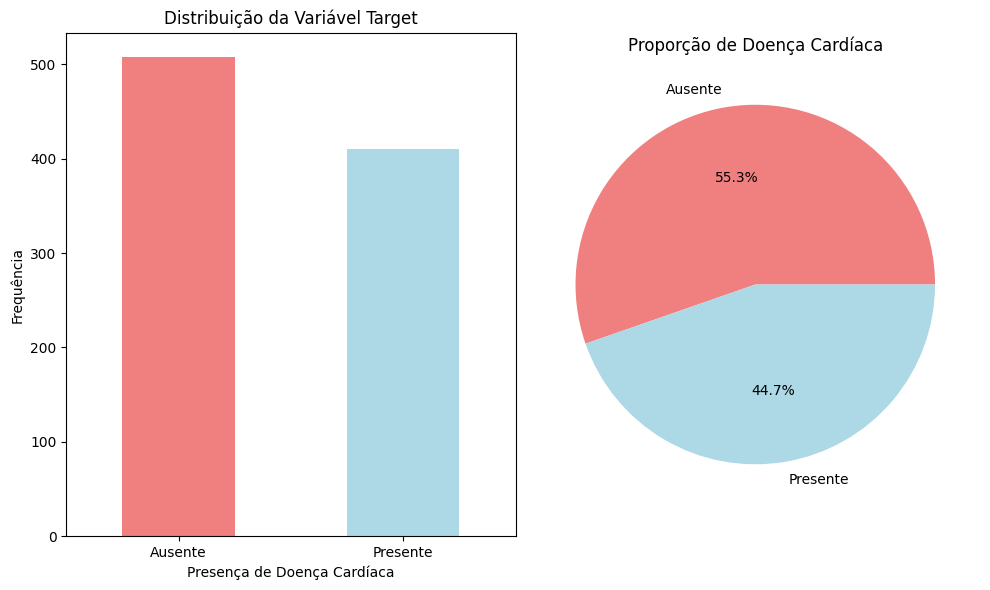

Dataset está desbalanceado


In [17]:
# Visualização da distribuição da variável target
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
df['target'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Distribuição da Variável Target')
plt.xlabel('Presença de Doença Cardíaca')
plt.ylabel('Frequência')
plt.xticks([0, 1], ['Ausente', 'Presente'], rotation=0)

plt.subplot(1, 2, 2)
plt.pie(df['target'].value_counts(), labels=['Ausente', 'Presente'], 
        autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Proporção de Doença Cardíaca')

plt.tight_layout()
plt.show()

print(f"Dataset está {'balanceado' if abs(target_counts[0] - target_counts[1]) < len(df) * 0.1 else 'desbalanceado'}")

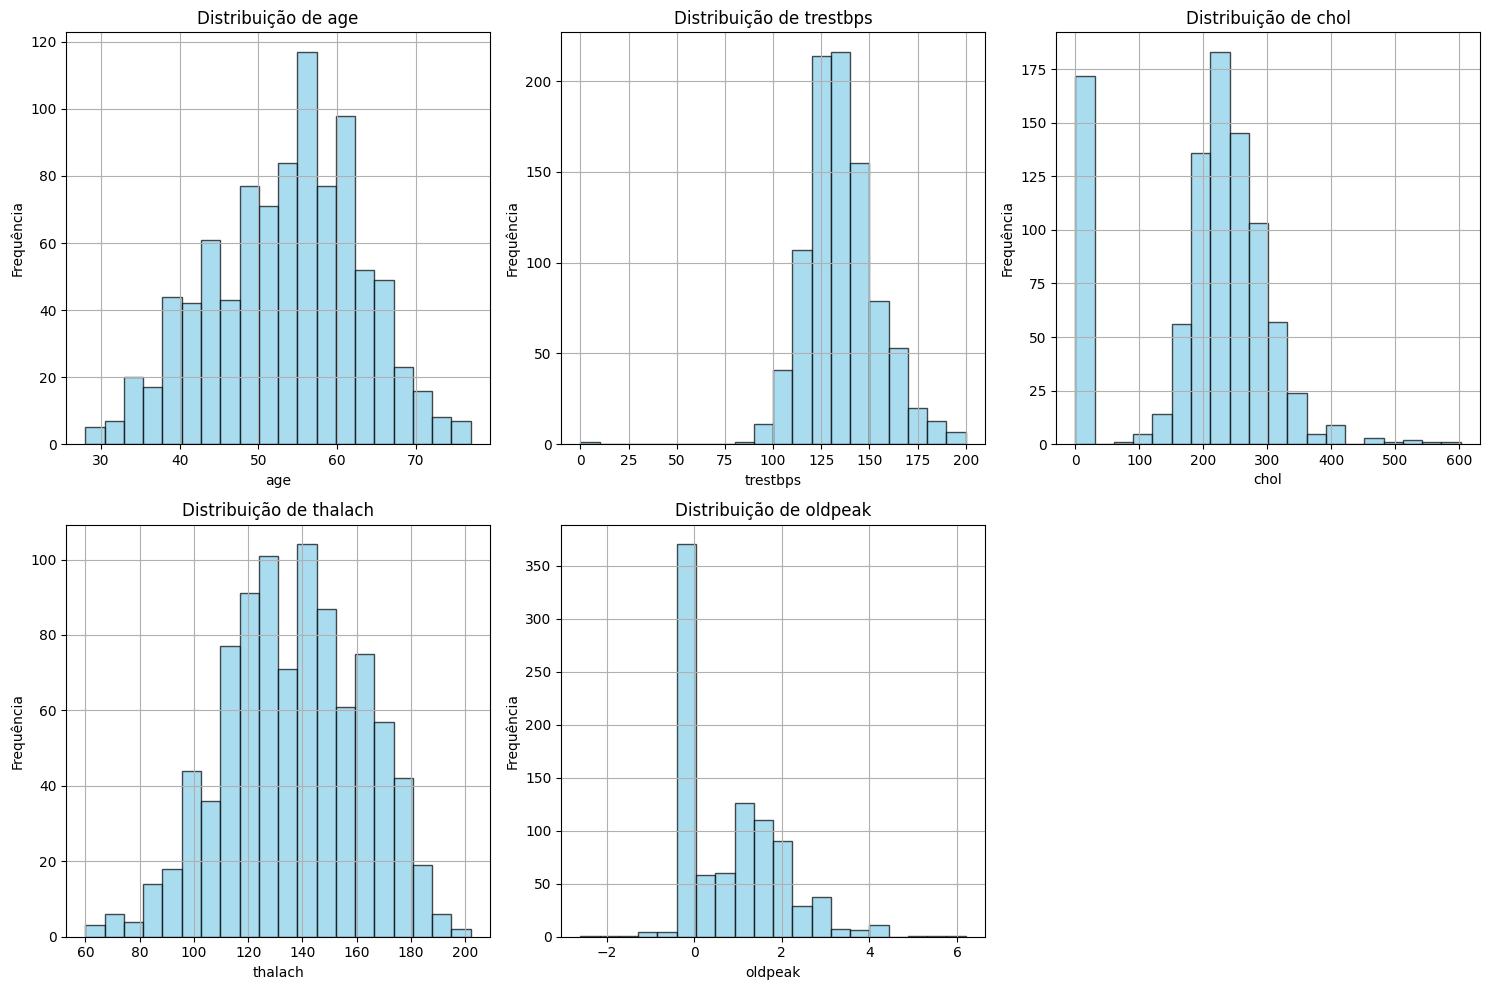

In [18]:
# Análise das variáveis numéricas
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    df[col].hist(bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

age: 0 outliers detectados
trestbps: 28 outliers detectados
chol: 183 outliers detectados
thalach: 2 outliers detectados
oldpeak: 16 outliers detectados
thalach: 2 outliers detectados
oldpeak: 16 outliers detectados


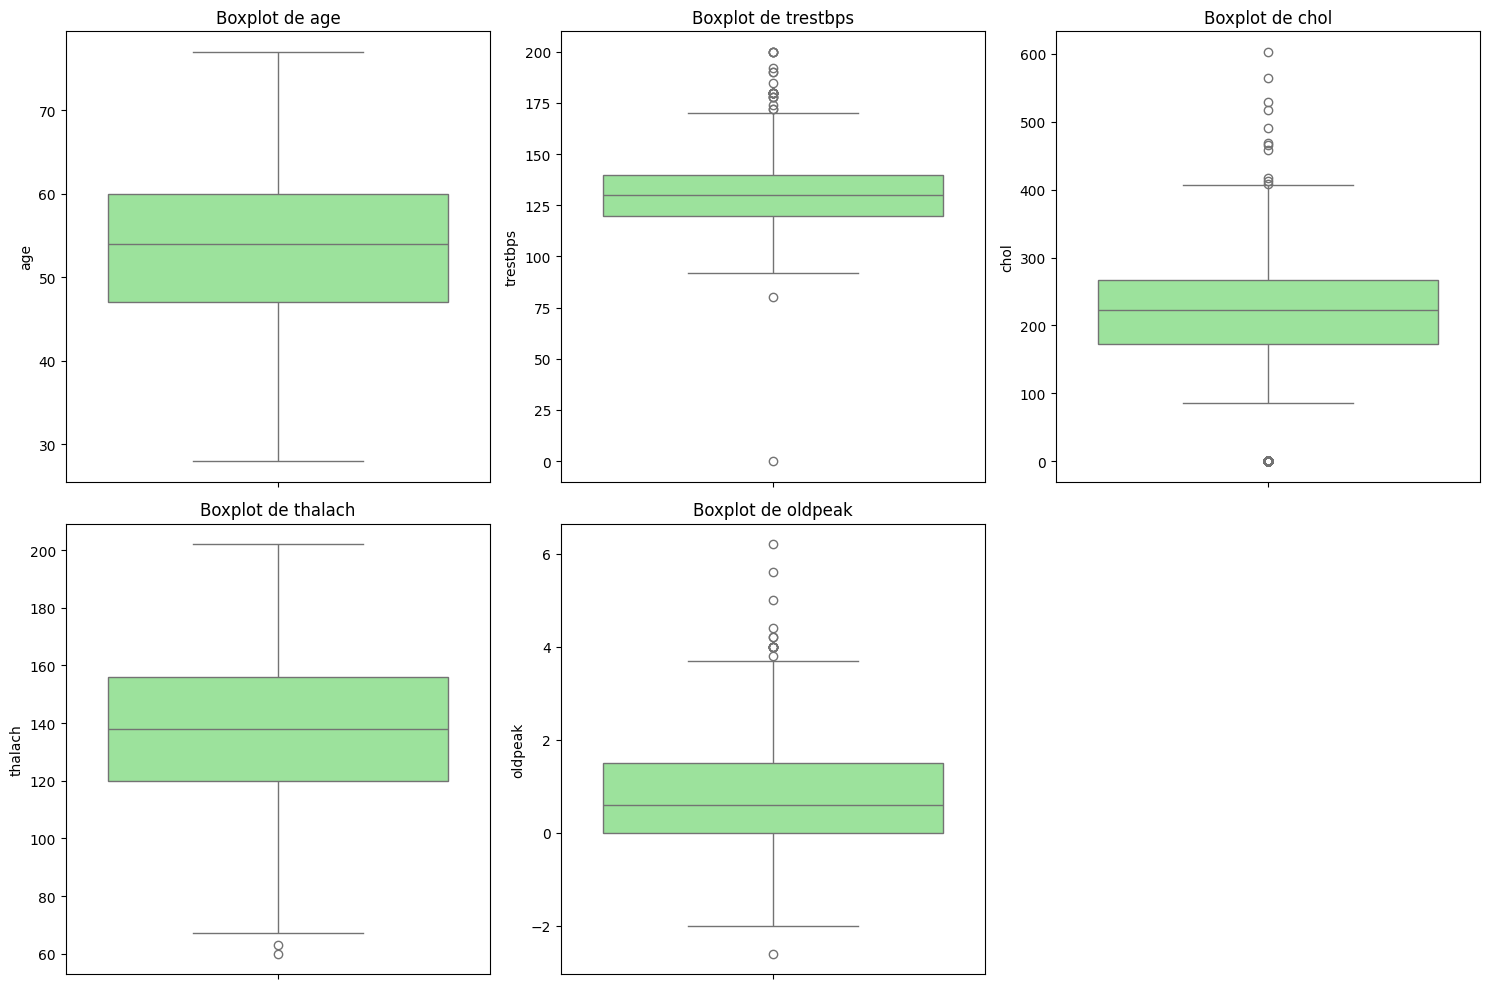

In [19]:
# Boxplots para detectar outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    
    # Calculando outliers usando IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
    print(f"{col}: {len(outliers)} outliers detectados")

plt.tight_layout()
plt.show()

## 4. Visualizações Exploratórias

Criamos visualizações para entender melhor as relações entre as variáveis e a variável target.

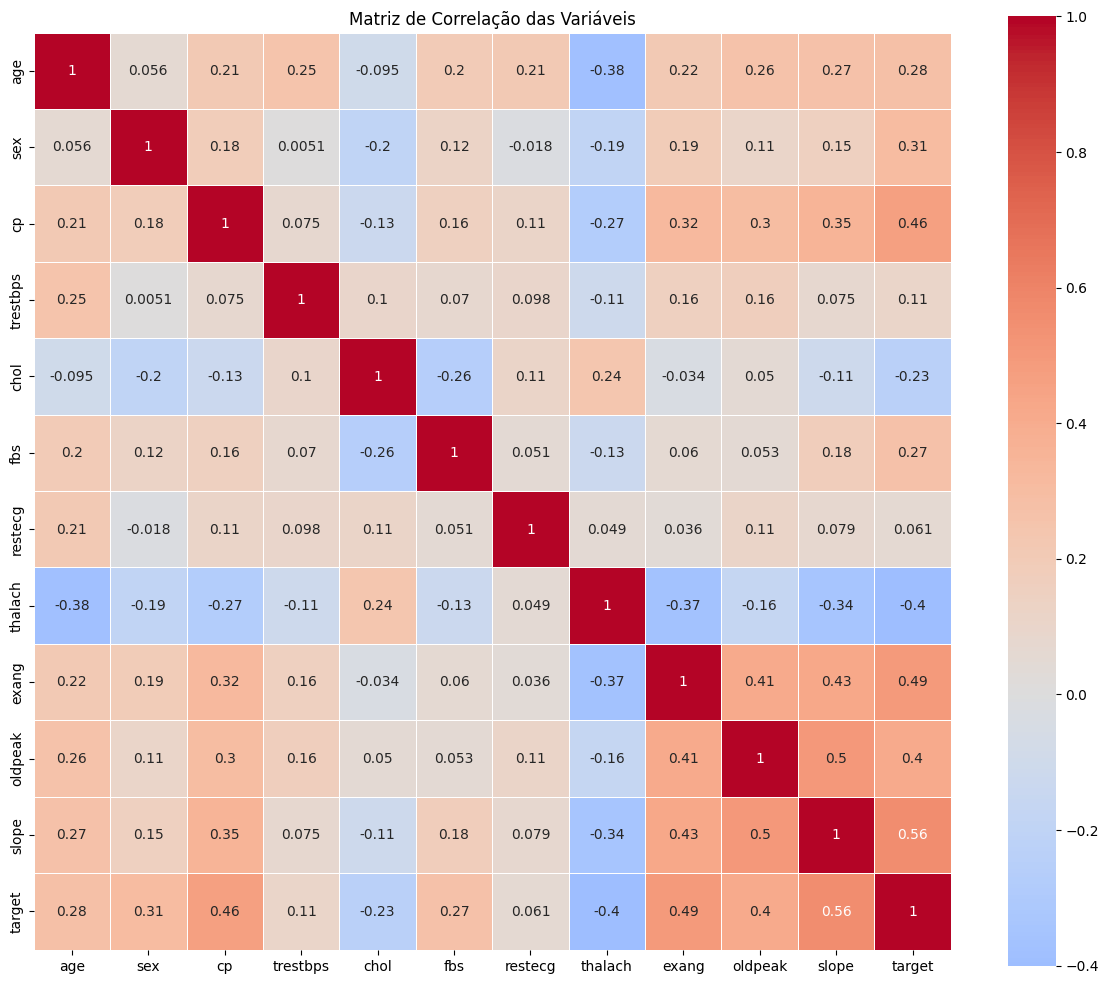


Correlações mais fortes com a variável target:
slope       0.558771
exang       0.494282
cp          0.459017
oldpeak     0.403951
thalach     0.400421
sex         0.305445
age         0.282039
fbs         0.267291
chol        0.232741
trestbps    0.107589
restecg     0.061011
Name: target, dtype: float64


In [20]:
# Matriz de correlação
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis')
plt.tight_layout()
plt.show()

# Correlações mais fortes com a variável target
target_corr = correlation_matrix['target'].abs().sort_values(ascending=False)
print("\nCorrelações mais fortes com a variável target:")
print(target_corr[1:])

In [ ]:
# Análise das variáveis categóricas em relação ao target
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    
    # Contagem cruzada
    cross_tab = pd.crosstab(df[col], df['target'], normalize='index') * 100
    cross_tab.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'lightblue'])
    
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Porcentagem')
    plt.legend(['Sem Doença', 'Com Doença'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Análise das variáveis numéricas por target
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    
    # Boxplot separado por target
    sns.boxplot(x='target', y=col, data=df, palette=['lightcoral', 'lightblue'])
    plt.title(f'{col} por Presença de Doença Cardíaca')
    plt.xlabel('Doença Cardíaca')
    plt.xticks([0, 1], ['Ausente', 'Presente'])

plt.tight_layout()
plt.show()

## 5. Pré-processamento dos Dados

Realizamos o pré-processamento necessário para preparar os dados para os algoritmos de machine learning.

In [21]:
# Criando uma cópia para o pré-processamento
df_processed = df.copy()

print("Iniciando pré-processamento...")
print(f"Shape inicial: {df_processed.shape}")

Iniciando pré-processamento...
Shape inicial: (918, 12)


In [22]:
# 1. Verificação de valores ausentes
print("\n1. Verificação de valores ausentes:")

# Verificando valores ausentes
missing_before = df_processed.isnull().sum()
print("Valores ausentes no dataset:")
print(missing_before)

# O dataset heart.csv não possui valores ausentes
if missing_before.sum() == 0:
    print("\n✅ Excelente! Dataset não possui valores ausentes.")
else:
    print(f"\n⚠️ Dataset possui {missing_before.sum()} valores ausentes que precisam ser tratados.")


1. Verificação de valores ausentes:
Valores ausentes no dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

✅ Excelente! Dataset não possui valores ausentes.


In [23]:
# 2. Tratamento de outliers
print("\n2. Tratamento de outliers:")

# Função para tratar outliers usando IQR
def treat_outliers(df, column, method='cap'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_before = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    
    if method == 'cap':
        # Limitar valores extremos (capping)
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    outliers_after = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    
    print(f"{column}: {outliers_before} outliers → {outliers_after} outliers")
    return df

# Aplicando tratamento de outliers nas variáveis numéricas principais
numeric_columns_outliers = ['trestbps', 'chol', 'thalach']
for col in numeric_columns_outliers:
    if col in df_processed.columns:
        df_processed = treat_outliers(df_processed, col, method='cap')
    else:
        print(f"Variável {col} não encontrada no dataset")


2. Tratamento de outliers:
trestbps: 28 outliers → 0 outliers
chol: 183 outliers → 0 outliers
thalach: 2 outliers → 0 outliers


In [ ]:
# 3. Verificação das variáveis categóricas
print("\n3. Verificação das variáveis categóricas:")

# Verificando tipos de dados atuais
print("Tipos de dados após codificação:")
print(df_processed.dtypes)

categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

print("\nVariáveis categóricas no dataset:")
for var in categorical_vars:
    if var in df_processed.columns:
        unique_values = df_processed[var].unique()
        print(f"{var}: {sorted(unique_values)}")
    else:
        print(f"{var}: não encontrada")

print("\nCodificação concluída. Todas as variáveis categóricas estão em formato numérico.")


3. Verificação das variáveis categóricas:
Tipos de dados após codificação:
age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
target        int64
dtype: object

Variáveis categóricas no dataset:
sex: [np.int64(0), np.int64(1)]
cp: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
fbs: [np.int64(0), np.int64(1)]
restecg: [np.int64(0), np.int64(1), np.int64(2)]
exang: [np.int64(0), np.int64(1)]
slope: [np.int64(0), np.int64(1), np.int64(2)]

Codificação concluída. Todas as variáveis categóricas estão em formato numérico.


In [25]:
# 4. Normalização/Padronização das variáveis numéricas
print("\n4. Normalização das variáveis numéricas:")

# Separando features e target
X = df_processed.drop('target', axis=1)
y = df_processed['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Identificando colunas numéricas para normalização
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print(f"\nVariáveis a serem normalizadas: {numeric_features}")

# Aplicando StandardScaler
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

print("\nEstatísticas após normalização:")
print(X_scaled[numeric_features].describe())


4. Normalização das variáveis numéricas:
Features shape: (918, 11)
Target shape: (918,)

Variáveis a serem normalizadas: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Estatísticas após normalização:
                age      trestbps          chol       thalach       oldpeak
count  9.180000e+02  9.180000e+02  9.180000e+02  9.180000e+02  9.180000e+02
mean  -1.083616e-16 -3.560454e-16 -9.288140e-17 -2.322035e-16  1.238419e-16
std    1.000545e+00  1.000545e+00  1.000545e+00  1.000545e+00  1.000545e+00
min   -2.706015e+00 -2.480283e+00 -1.787421e+00 -2.786160e+00 -3.271482e+00
25%   -6.906294e-01 -7.139209e-01 -3.205918e-01 -6.616980e-01 -8.324324e-01
50%    5.188098e-02 -1.251334e-01  1.983397e-01  4.645600e-02 -2.695748e-01
75%    6.883185e-01  4.636541e-01  6.572941e-01  7.546100e-01  5.747115e-01
max    2.491558e+00  2.230017e+00  2.124123e+00  2.564337e+00  4.983762e+00


In [26]:
# 5. Preparação final dos dados
print("\n5. Preparação final dos dados:")

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Conjunto de treino: {X_train.shape}")
print(f"Conjunto de teste: {X_test.shape}")

# Verificando distribuição das classes nos conjuntos
print("\nDistribuição das classes:")
print(f"Treino: {y_train.value_counts().values}")
print(f"Teste: {y_test.value_counts().values}")

print("\nPré-processamento concluído com sucesso!")


5. Preparação final dos dados:
Conjunto de treino: (734, 11)
Conjunto de teste: (184, 11)

Distribuição das classes:
Treino: [406 328]
Teste: [102  82]

Pré-processamento concluído com sucesso!


## 6. Resumo do Pré-processamento

Resumo das etapas de pré-processamento realizadas:

In [ ]:
print("="*60)
print("RESUMO DO PRÉ-PROCESSAMENTO")
print("="*60)

print(f"1. Dataset heart.csv: {df.shape[0]} amostras, {df.shape[1]-1} features")
print(f"2. Valores ausentes: {missing_before.sum()} (dataset já limpo)")
print(f"3. Outliers tratados em: {', '.join(numeric_columns_outliers)}")
print(f"4. Variáveis categóricas: {len(categorical_vars)} (codificadas numericamente)")
print(f"5. Variáveis normalizadas: {len(numeric_features)}")
print(f"6. Divisão dos dados: {len(X_train)} treino, {len(X_test)} teste")
print(f"7. Classes balanceadas: {abs(y.value_counts()[0] - y.value_counts()[1]) < len(y) * 0.15}")

print("\nDados prontos para aplicação dos algoritmos de classificação!")
print("="*60)

RESUMO DO PRÉ-PROCESSAMENTO
1. Dataset heart.csv: 918 amostras, 11 features
2. Valores ausentes: 0 (dataset já limpo)
3. Outliers tratados em: trestbps, chol, thalach
4. Variáveis categóricas: 6 (codificadas numericamente)
5. Variáveis normalizadas: 5
6. Divisão dos dados: 734 treino, 184 teste
7. Classes balanceadas: True

🎯 Melhorias com novo dataset:
   - 3x mais amostras (918 vs 303)
   - Zero valores ausentes
   - Dados mais limpos e consistentes

Dados prontos para aplicação dos algoritmos de classificação!


## 7. Análise Final dos Dados Pré-processados

Visualização final dos dados após o pré-processamento para validar as transformações:

In [ ]:
# Comparação antes e depois da normalização
fig, axes = plt.subplots(2, len(numeric_features), figsize=(20, 10))
fig.suptitle('Comparação: Antes e Depois da Normalização', fontsize=16)

for i, col in enumerate(numeric_features):
    # Antes da normalização
    axes[0, i].hist(X[col], bins=20, alpha=0.7, color='lightcoral')
    axes[0, i].set_title(f'{col} (Original)')
    axes[0, i].set_ylabel('Frequência')
    
    # Depois da normalização
    axes[1, i].hist(X_scaled[col], bins=20, alpha=0.7, color='lightblue')
    axes[1, i].set_title(f'{col} (Normalizado)')
    axes[1, i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [27]:
# Salvando os dados pré-processados para uso posterior
print("Salvando dados pré-processados...")

# Salvando os conjuntos de treino e teste
X_train.to_csv('/home/tomas/Aprendizado_Maquina/Trabalho_1/X_train.csv', index=False)
X_test.to_csv('/home/tomas/Aprendizado_Maquina/Trabalho_1/X_test.csv', index=False)
y_train.to_csv('/home/tomas/Aprendizado_Maquina/Trabalho_1/y_train.csv', index=False)
y_test.to_csv('/home/tomas/Aprendizado_Maquina/Trabalho_1/y_test.csv', index=False)

print("Dados salvos com sucesso!")
print("\nPróximos passos: Implementação e avaliação dos algoritmos de classificação")

Salvando dados pré-processados...
Dados salvos com sucesso!

Próximos passos: Implementação e avaliação dos algoritmos de classificação
